使用linear激活函式來訓練(-1~1)範圍內進行"乘上-1"的神經網路

# Include

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-03-25 20:54:03.701801: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [4]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='linear')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[0.72494113]], dtype=float32), array([0.], dtype=float32)]


2022-03-25 20:54:04.990536: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-25 20:54:05.026944: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-25 20:54:05.027030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2022-03-25 20:54:05.027057: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2022-03-25 20:54:05.027118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 455.32.0
2022-03-25 20:54:05.027146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2022-03-25 20:54:05.027153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 455.32.0
2022-03-25 20:54:05.027494: I tensorflow/core/platform/cpu_feature_gua

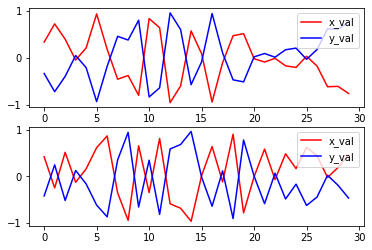

In [5]:
num = 1000
x_train = np.random.rand(num) * 2 - 1
y_train = x_train * -1
x_val = np.random.rand(num) * 2 - 1
y_val = x_val * -1
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [6]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [7]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-03-25 20:54:05.448444: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 20:54:05.450128: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000
16/16 [==============================] - 0s 7ms/step - loss: 1.0034 - val_loss: 0.9457
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.9850 - val_loss: 0.9277
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.9666 - val_loss: 0.9106
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.9486 - val_loss: 0.8936
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.9308 - val_loss: 0.8769
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.9133 - val_loss: 0.8601
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.8960 - val_loss: 0.8439
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.8791 - val_loss: 0.8278
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.8622 - val_loss: 0.8120
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.8459 - val_lo

[array([[-0.99999607]], dtype=float32), array([-3.611943e-08], dtype=float32)]


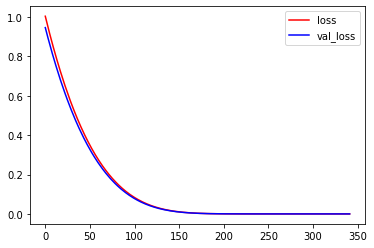

In [8]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

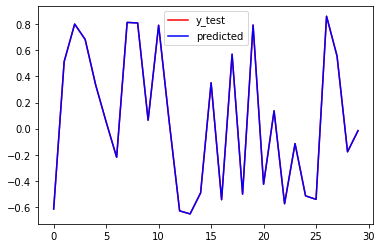

 0.617, -0.617, ads_diff =  0.000
-0.514,  0.514, ads_diff = -0.000
-0.802,  0.802, ads_diff = -0.000
-0.684,  0.684, ads_diff = -0.000
-0.336,  0.336, ads_diff = -0.000
-0.052,  0.052, ads_diff = -0.000
 0.220, -0.220, ads_diff =  0.000
-0.814,  0.814, ads_diff = -0.000
-0.810,  0.810, ads_diff = -0.000
-0.065,  0.065, ads_diff = -0.000
-0.793,  0.793, ads_diff = -0.000
-0.059,  0.059, ads_diff = -0.000
 0.631, -0.631, ads_diff =  0.000
 0.654, -0.654, ads_diff =  0.000
 0.493, -0.493, ads_diff =  0.000
-0.351,  0.351, ads_diff = -0.000
 0.545, -0.545, ads_diff =  0.000
-0.571,  0.571, ads_diff = -0.000
 0.503, -0.503, ads_diff =  0.000
-0.794,  0.794, ads_diff = -0.000
 0.427, -0.427, ads_diff =  0.000
-0.136,  0.136, ads_diff = -0.000
 0.576, -0.576, ads_diff =  0.000
 0.115, -0.115, ads_diff =  0.000
 0.516, -0.516, ads_diff =  0.000
 0.543, -0.543, ads_diff =  0.000
-0.862,  0.862, ads_diff = -0.000
-0.556,  0.556, ads_diff = -0.000
 0.178, -0.178, ads_diff =  0.000
 0.016, -0.016

In [11]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {predicted[i, 0] + x_test[i]:6.3f}')